In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('telco_cust_churn_data.csv',)

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Checking for data types ###

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


DATA CLEANING

In [6]:
missing = pd.DataFrame(df.isna().sum()).rename(columns = {0:'missing Values'})
missing

,missing Values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


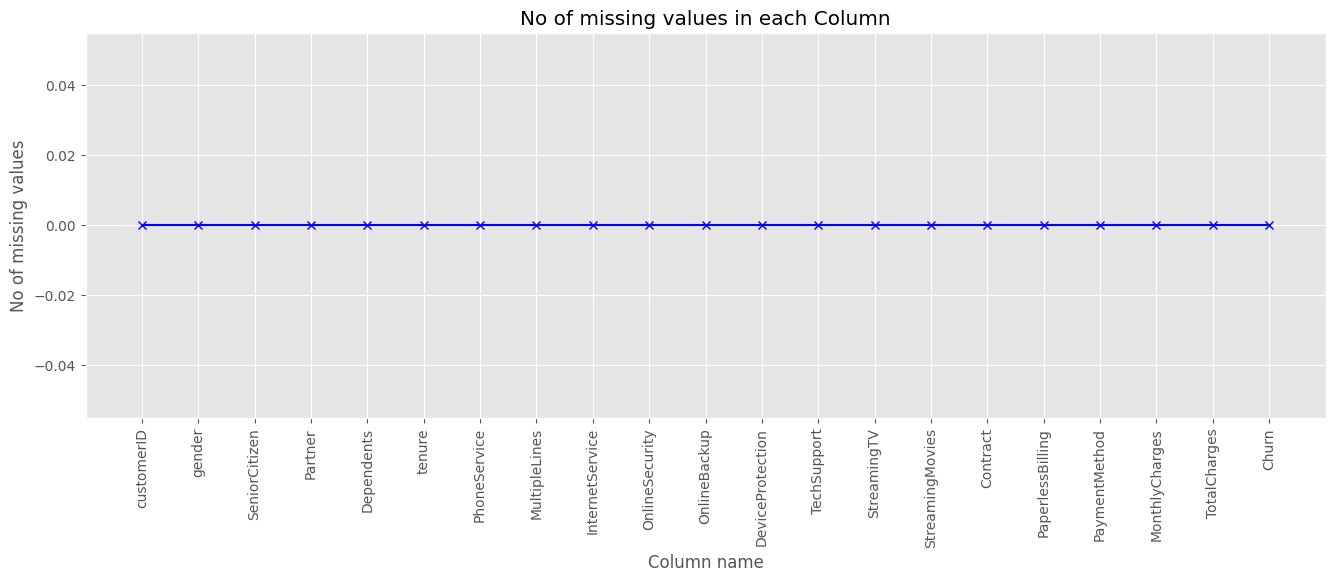

In [7]:
plt.style.use('ggplot')
plt.figure(figsize = (16,5))
plt.plot(missing.index, missing['missing Values'], marker ='x' , color = 'b')
plt.xlabel('Column name')
plt.xticks(rotation =90)
plt.ylabel('No of missing values')
plt.title('No of missing values in each Column')
plt.show()

### There are no missing values in any columns ###

In [8]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

### After converted 'totalcharges' to float, we can see that we have 11 missing values. these missing values will have to be dropped ###

In [10]:
df['totalcharges'].isna().sum()

11

In [11]:
rows_with_missing_values = df.loc[df.isna().any(axis = 1)]


In [12]:
df = df.dropna()

In [13]:
df.head(10)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


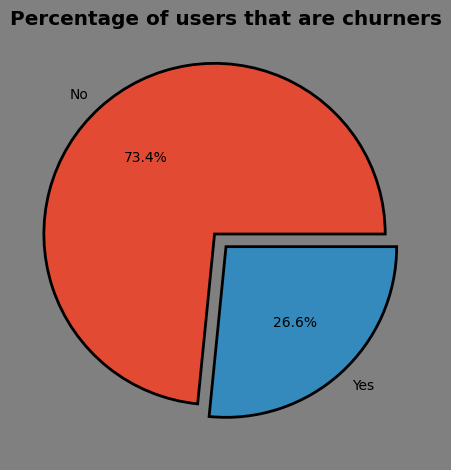

In [14]:
churn = df['churn'].value_counts().to_frame().reset_index()
ch = churn['churn']
count = churn['count']

fig, ax = plt.subplots()
fig.set_facecolor('grey')
ax.pie(count, explode = [0.1,0],
       labels = ch, wedgeprops ={'edgecolor' : 'black', 'linewidth': 2}, autopct = '%1.1f%%')
ax.set_title('Percentage of users that are churners', fontweight = 'bold')
plt.tight_layout()
plt.show()

# From the pie chart above, we can see that 26.6 % of the people have churned. #

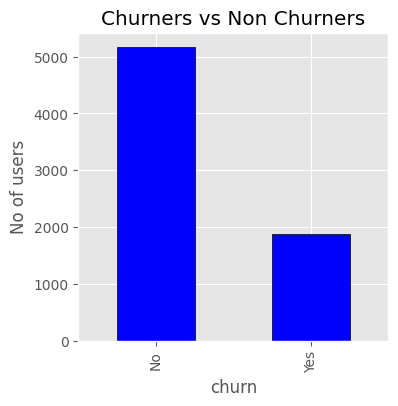

In [15]:
df.churn.value_counts().plot(kind = 'bar', color = 'blue', edgecolor = 'black', figsize = (4,4))
plt.title('Churners vs Non Churners')
plt.ylabel('No of users')
plt.show()

In [16]:
male_female = df.gender.value_counts()

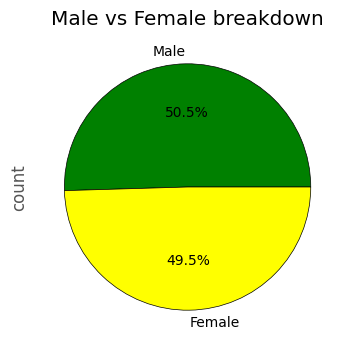

In [17]:
male_female.plot(kind = 'pie', colors = ['green','yellow'],autopct = '%1.1f%%',
                wedgeprops = {'edgecolor':'black'}, figsize = (4,4))
plt.title('Male vs Female breakdown')

plt.show()



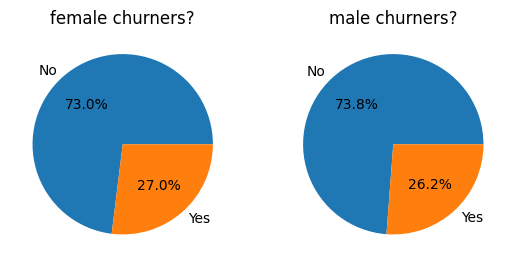

In [18]:
female_bd = df.groupby('gender')['churn'].value_counts().loc['Female'].to_frame().reset_index()
male_bd = df.groupby('gender')['churn'].value_counts().loc['Male'].to_frame().reset_index()

plt.style.use('default')
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

ax1.pie(female_bd['count'], labels = female_bd['churn'], autopct = '%1.1f%%')
ax1.set_title('female churners?')


ax2.pie(male_bd['count'], labels = male_bd['churn'], autopct = '%1.1f%%')
ax2.set_title('male churners?')






plt.show()

# There is almost no impact of gender on whether a customer is going to churn or not #

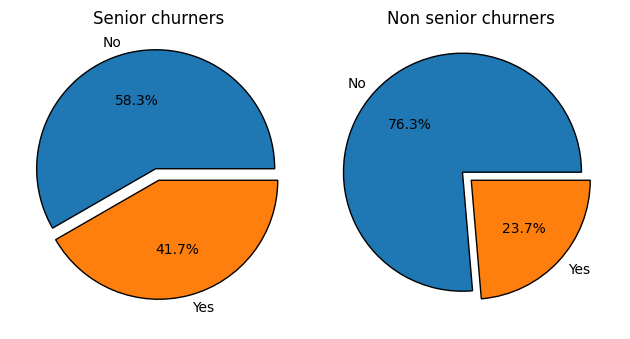

In [19]:
not_senior = df.groupby('seniorcitizen')['churn'].value_counts(normalize = True).loc[0].to_frame().reset_index()
senior = df.groupby('seniorcitizen')['churn'].value_counts(normalize = True).loc[1].to_frame().reset_index()

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.pie(senior.proportion, labels = senior.churn, autopct = '%1.1f%%', explode = [0.1,0] ,
        wedgeprops = {'edgecolor':'black'})
ax1.set_title('Senior churners')

ax2.pie(not_senior.proportion, labels = not_senior.churn, explode = [0.1,0],
        wedgeprops = {'edgecolor':'black'},
        autopct = '%1.1f%%')
ax2.set_title('Non senior churners')

plt.tight_layout()
plt.show()

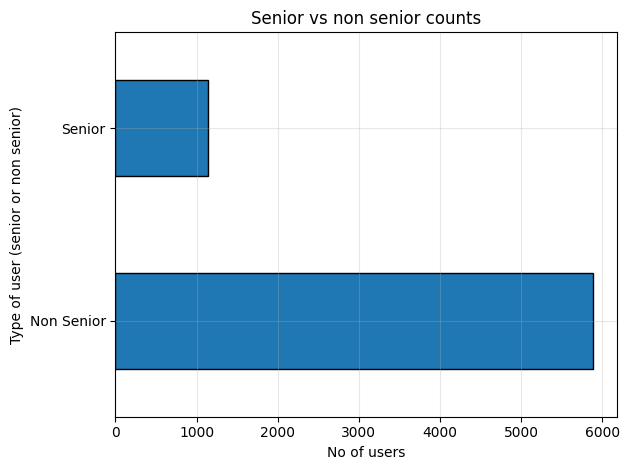

In [20]:
df['seniorcitizen'].value_counts().plot(kind = 'barh', edgecolor = 'black')
plt.yticks(ticks = [0,1], labels = ['Non Senior', 'Senior'], rotation = 0)
plt.title('Senior vs non senior counts')
plt.xlabel('No of users')
plt.ylabel('Type of user (senior or non senior)')
plt.grid(alpha = 0.3)
plt.tight_layout()
plt.show()

# From the two figures above we can see that Senior citiens have higher proportion of churners compared to non senior citizens. However, this doesnt take into account that the data their are far more.Total senior churners are 470 whereas non senior churners are 1393 which is almost 3 times more than that of seniors. Hence, non senior users should be given more importance#

In [21]:
df.groupby('seniorcitizen')['churn'].value_counts()

seniorcitizen  churn
0              No       4497
               Yes      1393
1              No        666
               Yes       476
Name: count, dtype: int64

In [22]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [23]:
st_test  = df.groupby('partner')['churn'].value_counts().to_frame().reset_index()
st_test

,partner,churn,count
0,No,No,2439
1,No,Yes,1200
2,Yes,No,2724
3,Yes,Yes,669


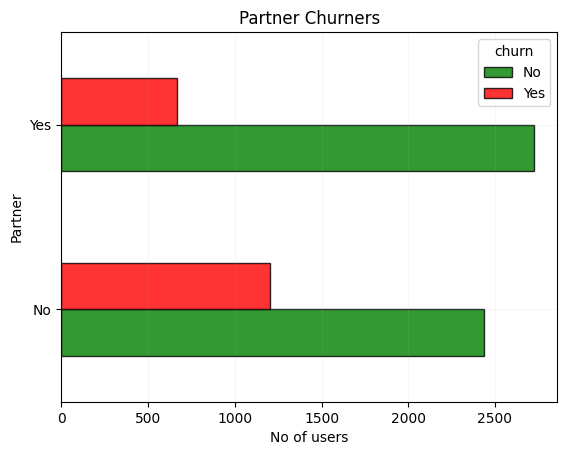

In [24]:
pd.pivot_table(st_test,values = 'count',index = 'partner', columns = 'churn', aggfunc ='sum').plot(kind = 'barh',
                                                                                                  edgecolor = 'black',
                                                                                                  color = ['green','red'],
                                                                                                   alpha = 0.8)
plt.xlabel('No of users')
plt.ylabel('Partner')
plt.title('Partner Churners')
plt.grid(alpha = 0.1)

plt.show()


In [25]:
partner_churn_percent = df.groupby('partner')['churn'].value_counts(normalize = True).to_frame()
partner_churn_percent

proportion
partner churn            
No      No       0.670239
        Yes      0.329761
Yes     No       0.802829
        Yes      0.197171

In [26]:
partner_churn_num = df.groupby('partner')['churn'].value_counts().to_frame()
partner_churn_num

count
partner churn       
No      No      2439
        Yes     1200
Yes     No      2724
        Yes      669

In [27]:
pd.merge(partner_churn_percent,partner_churn_num, on = ['partner', 'churn'])

proportion  count
partner churn                   
No      No       0.670239   2439
        Yes      0.329761   1200
Yes     No       0.802829   2724
        Yes      0.197171    669

### It can be seen that a greater proportion of non partners have churned compared to partners. This shows that we either need convert non partners to partners which will their likelyhood of staying with us or we need to provide non partners the same level of service so that they are satisfied with the service and dont feel the need to switch to one of our competitor ###

In [28]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [29]:
i = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport']


#for _ in i:
    #print(df.groupby('partner')[_].value_counts(normalize = True))

#for _ in i:
    #print(pd.merge(df.groupby('partner')[_].value_counts().to_frame(), 
                   #df.groupby('partner')[_].value_counts(normalize = True).to_frame(),
                            #on = ['partner', _]))



for _ in i:
    j = pd.DataFrame(pd.merge(df.groupby('partner')[_].value_counts().to_frame(), 
                   df.groupby('partner')[_].value_counts(normalize = True).to_frame(),
                            on = ['partner', _]))
    print(j)






                      count  proportion
partner phoneservice                   
No      Yes            3268    0.898049
        No              371    0.101951
Yes     Yes            3084    0.908930
        No              309    0.091070
                          count  proportion
partner multiplelines                      
No      No                 1980    0.544106
        Yes                1288    0.353943
        No phone service    371    0.101951
Yes     Yes                1679    0.494842
        No                 1405    0.414088
        No phone service    309    0.091070
                         count  proportion
partner internetservice                   
No      Fiber optic       1600    0.439681
        DSL               1252    0.344051
        No                 787    0.216268
Yes     Fiber optic       1496    0.440908
        DSL               1164    0.343059
        No                 733    0.216033
                             count  proportion
partner onlinesec

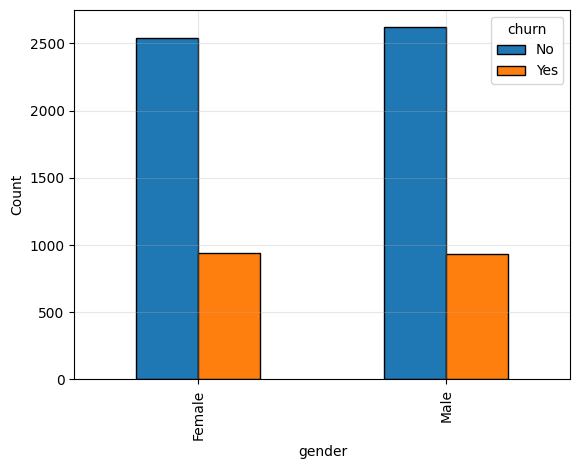

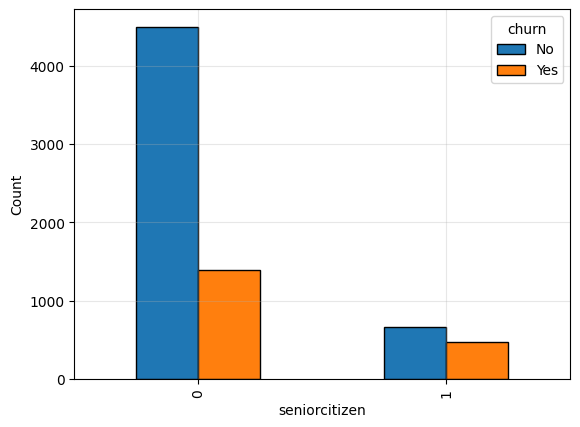

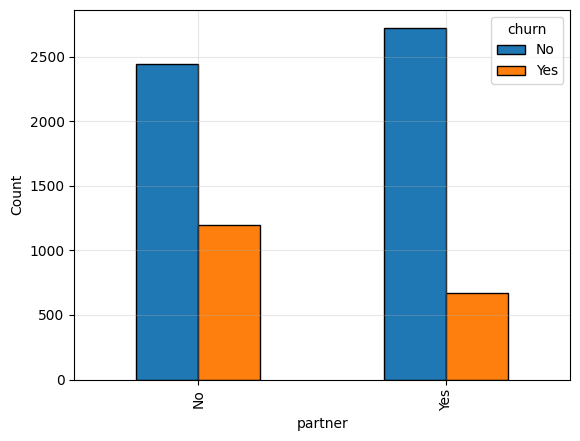

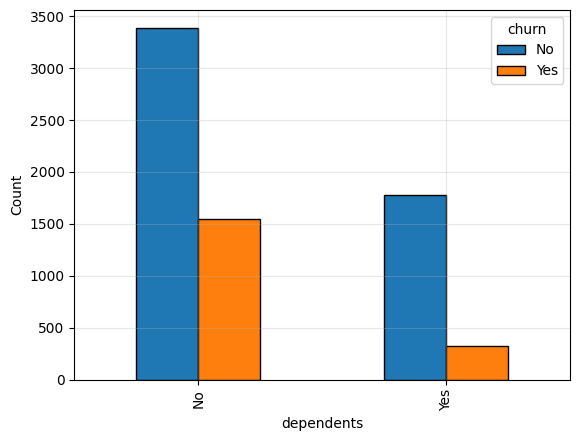

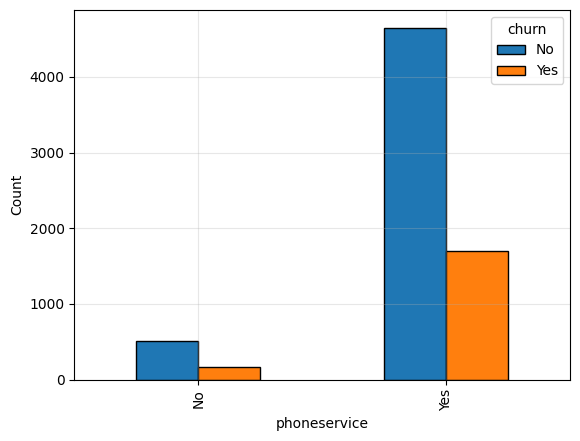

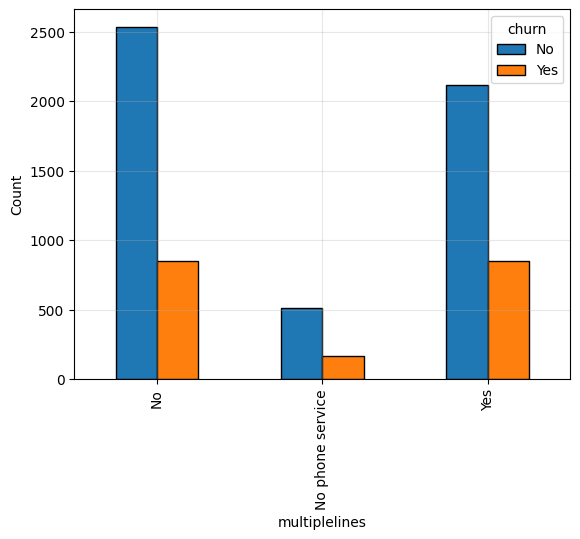

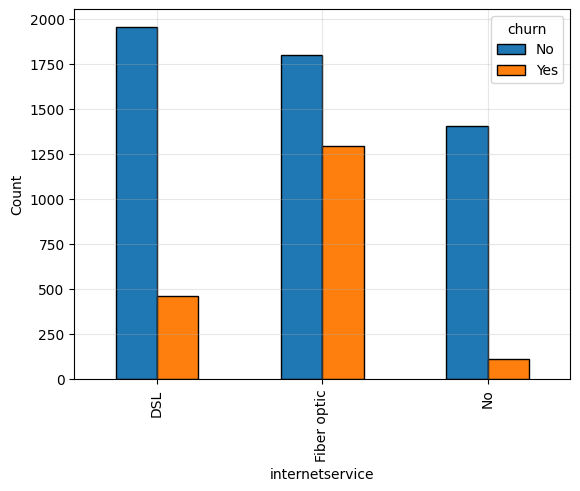

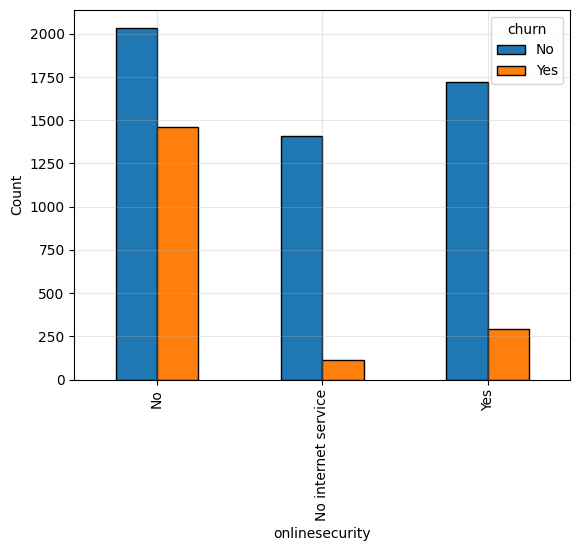

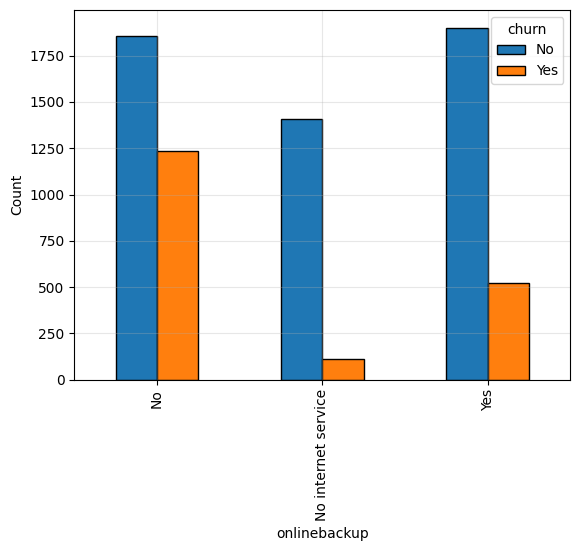

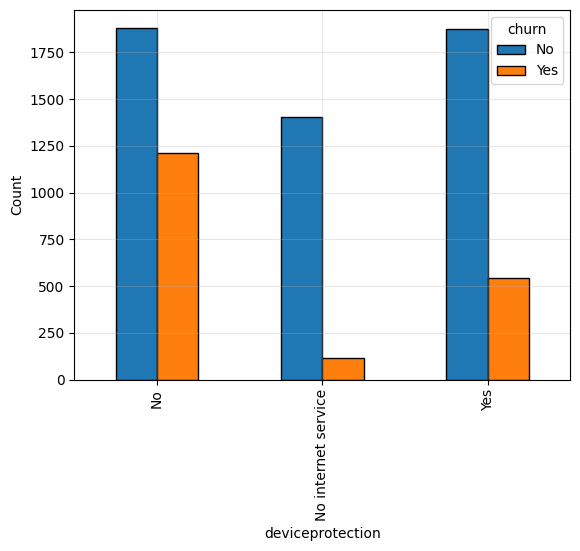

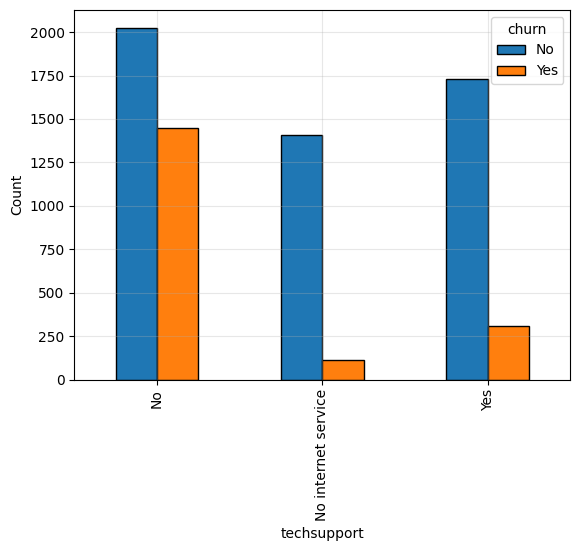

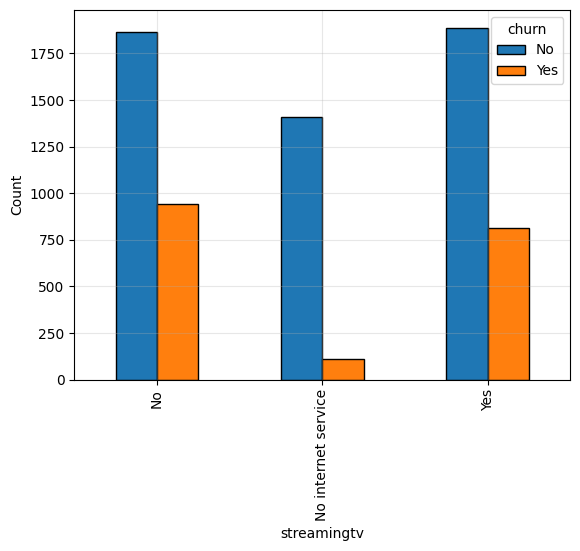

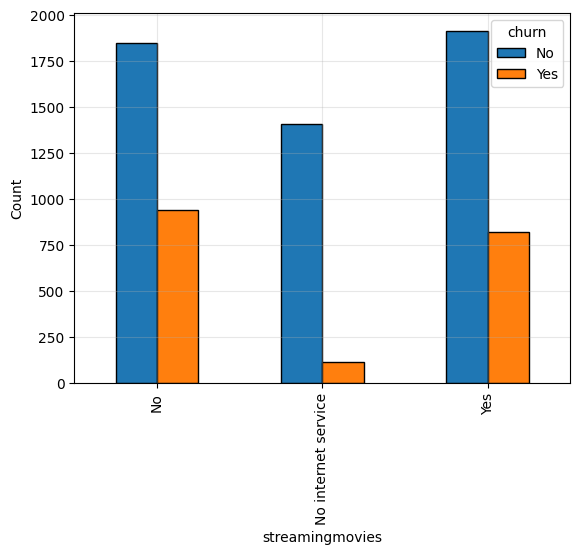

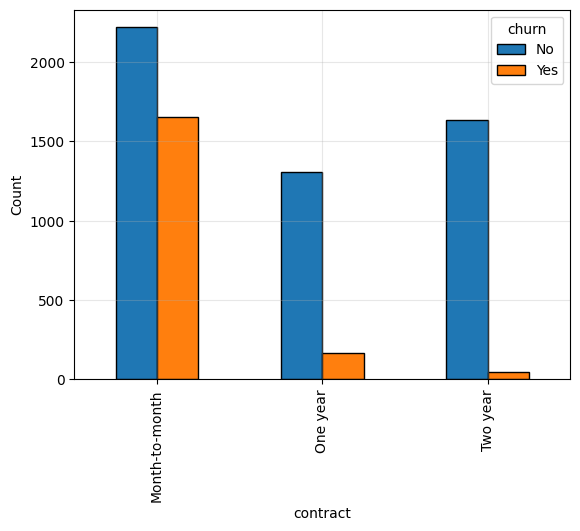

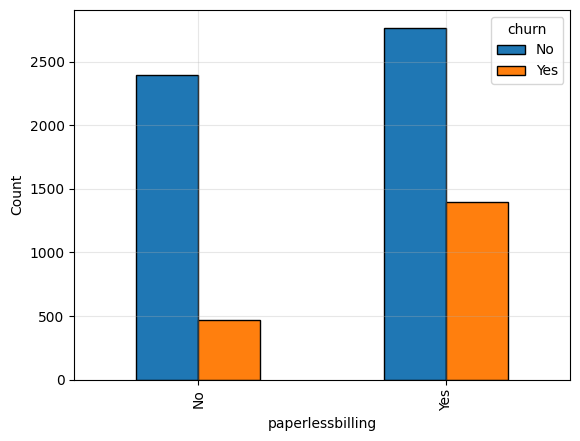

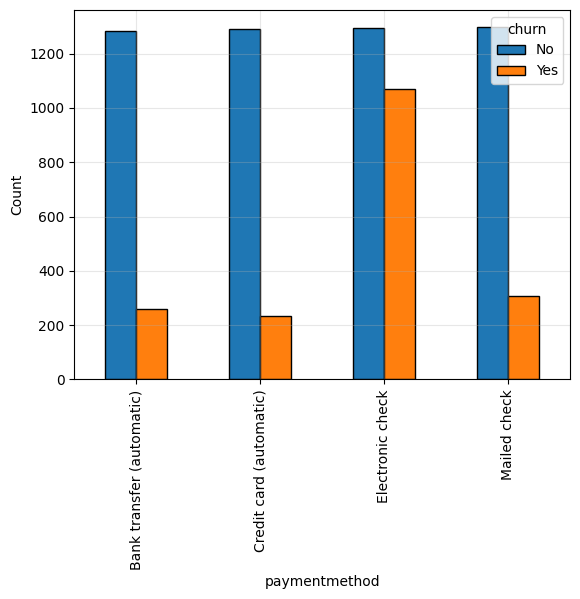

In [30]:
t = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']


for i in t:
    graph = pd.pivot_table(df.groupby(i)['churn'].value_counts().to_frame().reset_index(),index = i, values = 'count',
               columns = 'churn', aggfunc = 'sum')
    graph.plot(kind = 'bar', edgecolor = 'black')
    plt.ylabel('Count')
    plt.grid(alpha = 0.3)
    plt.show()
    




In [31]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [32]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [33]:
dummies = pd.get_dummies(df.drop('customerid', axis = 1))
dummies

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,True,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,False,True,False,True,False,True,...,True,False,False,True,False,False,False,True,True,False
7039,0,72,103.20,7362.90,True,False,False,True,False,True,...,True,False,False,True,False,True,False,False,True,False
7040,0,11,29.60,346.45,True,False,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7041,1,4,74.40,306.60,False,True,False,True,True,False,...,False,False,False,True,False,False,False,True,False,True


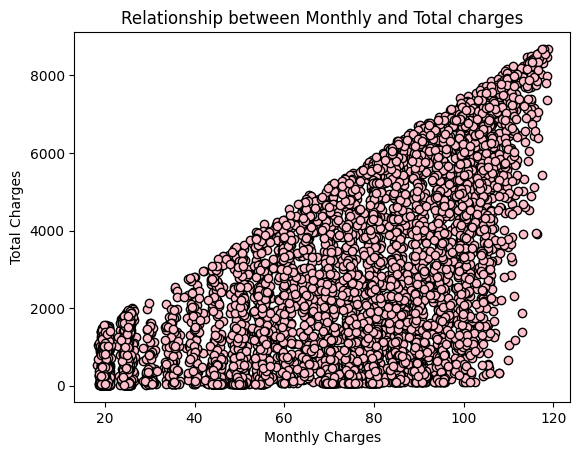

In [34]:
plt.scatter(dummies['monthlycharges'], dummies['totalcharges'], color = 'pink', edgecolor = 'black')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Relationship between Monthly and Total charges')
plt.show()

In [35]:
dummies

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_No,churn_Yes
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,True,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,False,True,False,True,False,True,...,True,False,False,True,False,False,False,True,True,False
7039,0,72,103.20,7362.90,True,False,False,True,False,True,...,True,False,False,True,False,True,False,False,True,False
7040,0,11,29.60,346.45,True,False,False,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7041,1,4,74.40,306.60,False,True,False,True,True,False,...,False,False,False,True,False,False,False,True,False,True


In [40]:
df.loc[df['churn'] == 'Yes', 'churn'] = 1

In [41]:
df.loc[df['churn'] == 'No', 'churn'] = 0

In [57]:
df.churn = pd.to_numeric(df.churn)

/var/folders/58/b3q3qsxs23j0hmhkxlt9jql80000gn/T/ipykernel_30289/1681889668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.churn = pd.to_numeric(df.churn)


In [60]:
dummies = pd.get_dummies(df.drop('customerid', axis = 1))

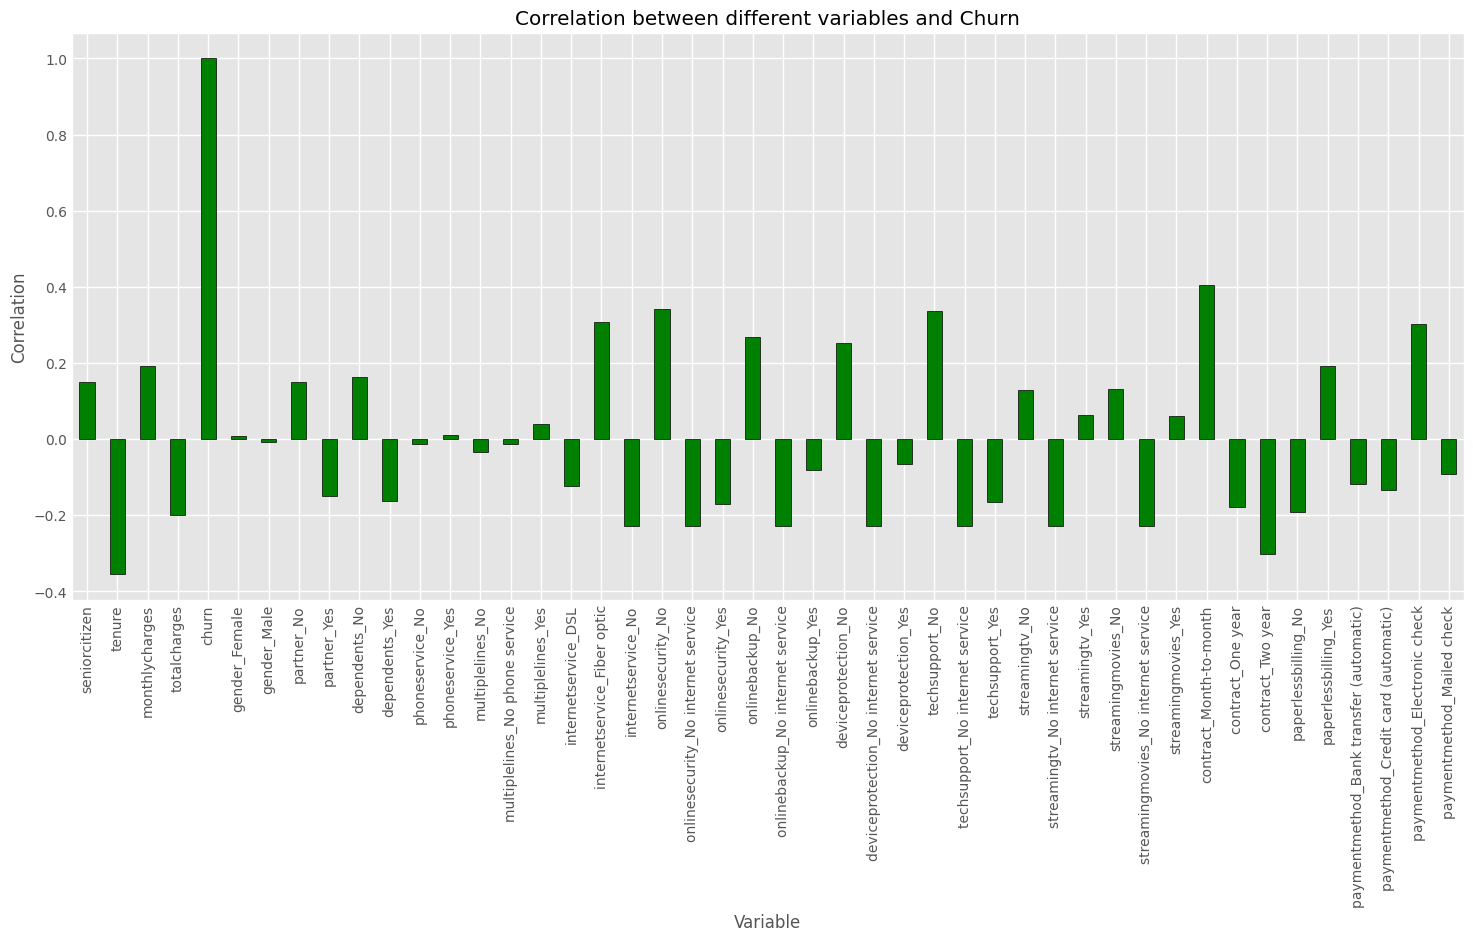

In [74]:
dummies.corr()['churn'].plot(kind = 'bar', figsize = (16,7), edgecolor = 'black', color = 'green')
plt.style.use('ggplot')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.title('Correlation between different variables and Churn')
plt.show()



#### HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet ####

#### LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years ####

#### Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn ####

#### This is also evident from the Heatmap below ####

####

In [77]:
import seaborn as sns

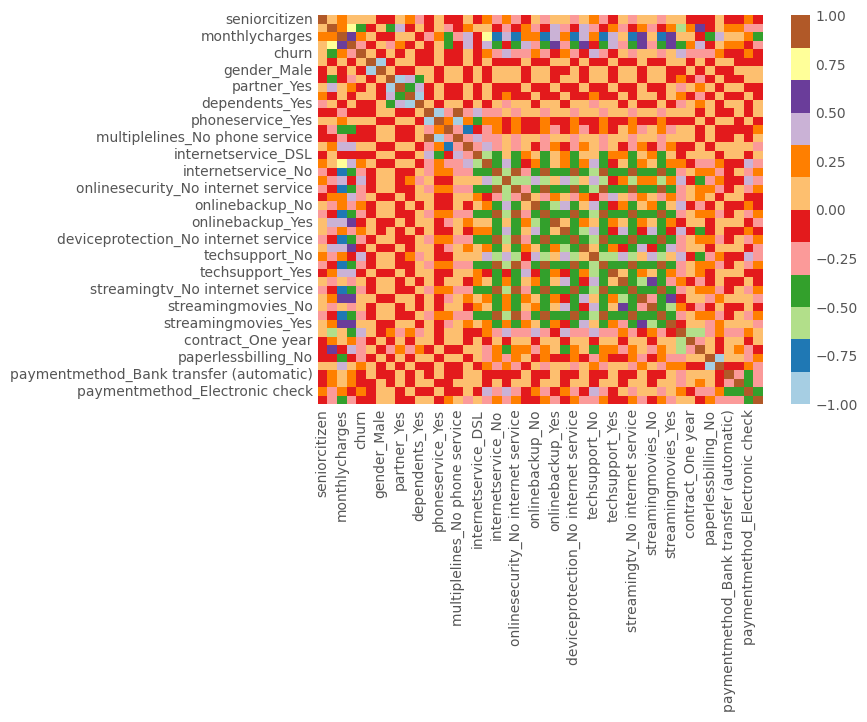

In [84]:
sns.heatmap(dummies.corr(), cmap = 'Paired')
plt.show()

### INSIGHTS FROM THE ANALYSIS ###

These are some of the quick insights from this exercise:

    Electronic check medium are the highest churners
    Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
    No Online security, No Tech Support category are high churners
    Non senior Citizens are high churners






/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


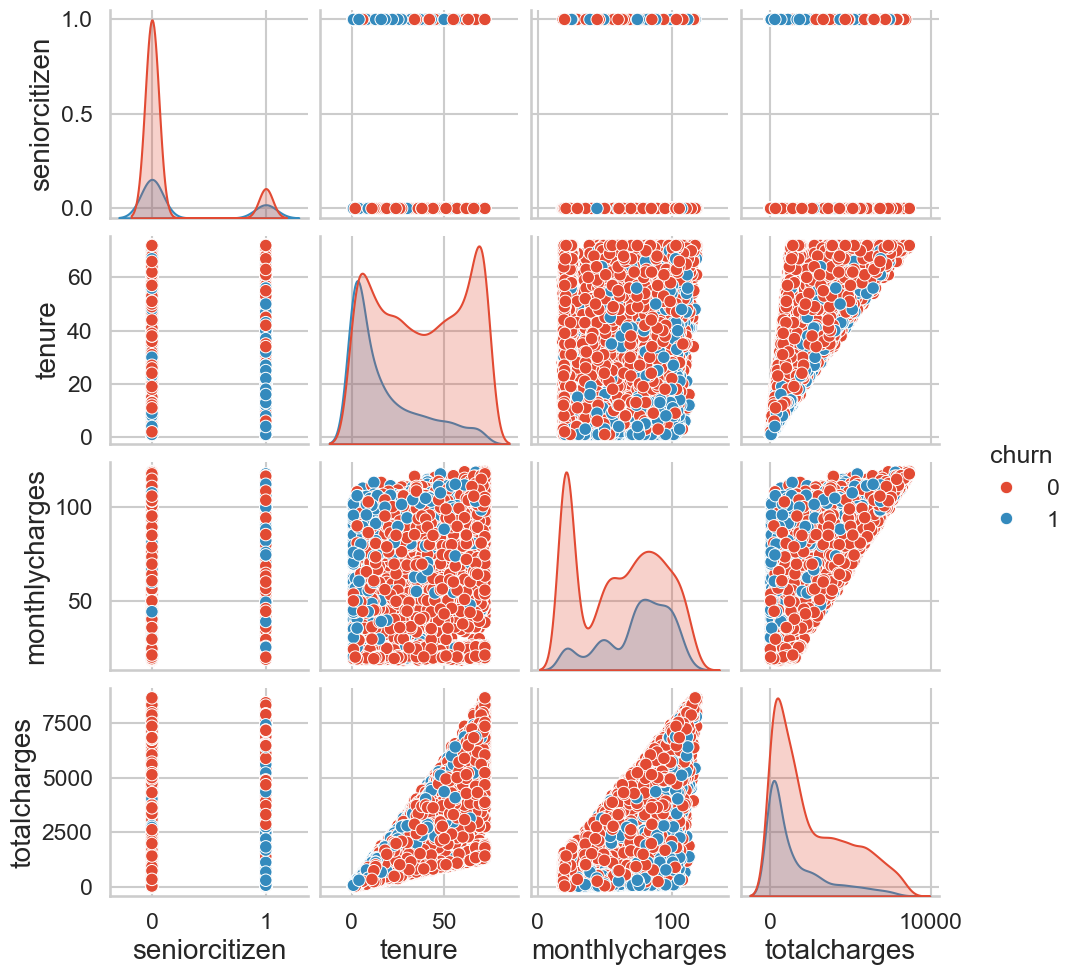

In [95]:
sns.pairplot(df, hue ='churn')
plt.show()